### Student Information
Name: Khemmanat Seehawallop (劉川)

Student ID: 109065424

GitHub ID: khemmanats

https://github.com/khemmanats/DM2020-Lab1-Homework1.git

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

---

# Part 1: Take home exercise

In [1]:
### This part is data preparation
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
import pandas as pd

# helper functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

### >>> **Exercise 2 (take home)**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# Query Conditions:
# 1. Select only 'sci.med' category by callable
# 2. Rearrange the columns (like how it's usually done in SQL query)
# 3. Ramdom 10 rows as a preview
# 4. Sort the randomed rows by index

X.loc[lambda f: f.category_name == 'sci.med'][['category','category_name','text']].sample(10).sort_index()

category category_name  \
237          2       sci.med   
378          2       sci.med   
391          2       sci.med   
574          2       sci.med   
793          2       sci.med   
1125         2       sci.med   
1211         2       sci.med   
1493         2       sci.med   
1842         2       sci.med   
2004         2       sci.med   

                                                   text  
237   From: rousseaua@immunex.com Subject: Re: Lacto...  
378   From: milsh@nmr-z.mgh.harvard.edu (Alex Milsht...  
391   From: tarl@sw.stratus.com (Tarl Neustaedter) S...  
574   From: mmm@cup.portal.com (Mark Robert Thorson)...  
793   From: caf@omen.UUCP (Chuck Forsberg WA7KGX) Su...  
1125  From: grante@aquarius.rosemount.com (Grant Edw...  
1211  From: paulson@tab00.larc.nasa.gov (Sharon Paul...  
1493  From: eulenbrg@carson.u.washington.edu (Julia ...  
1842  From: jnielsen@magnus.acs.ohio-state.edu (John...  
2004  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...

---

### >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

---

### >>>> **Answer for Exercise 5**
`.isnull()` treats `NaN` (Not a Number, which means undefined or unpresentable) and `None` as null values, but it doens't treat the strings of `'NaN'`, `'None'`, and `''` as null values.

In order to use `.isnull` effectively, all the strings that represent the meaning of null value (which are `'NaN'`, `'None'`, and `''`) must be replaced as either `np.nan` or `None` first.

---

### >>> Exercise 6 (take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
# X dataframe before using .sample()
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [6]:
# random 1st time
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [7]:
X_sample[0:4]

text  category  \
2154  From: kxgst1@pitt.edu (Kenneth Gilbert) Subjec...         2   
1766  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   
219   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
450   From: pharvey@quack.kfu.com (Paul Harvey) Subj...         3   

               category_name  
2154                 sci.med  
1766             alt.atheism  
219              alt.atheism  
450   soc.religion.christian

In [8]:
# random 2nd time
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [9]:
X_sample[0:4]

text  category  \
383   From: tw2@irz.inf.tu-dresden.de (Thomas Wolf) ...         1   
2044  From: Steve.Hayes@f22.n7101.z5.fidonet.org Sub...         3   
1744  From: davpa@ida.liu.se (David Partain) Subject...         2   
1964  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
383            comp.graphics  
2044  soc.religion.christian  
1744                 sci.med  
1964                 sci.med

In [10]:
# X dataframe after using .sample(), no changes
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

---

### >>>> **Answer for Exercise 6**

1. Method `.sample()` doesn't make any changes to the original `X`, only returns a set of randomly selected rows to store in the `X_sample`.
2. Method `.sample()` returns a different set of rows every time the method runs. Notice the 1st and 2nd time displaying `X_sample` of which the rows are assigned from `X.sample(n=1000)`, the results are not the same.

---

### >>> **Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot:title={'center':'Category distribution'}>

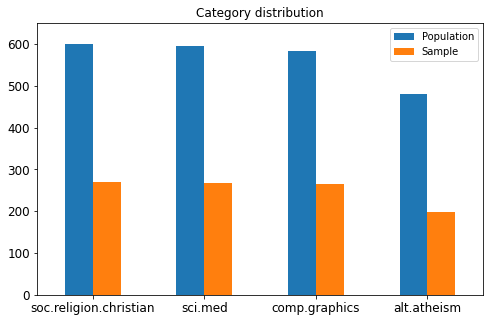

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# join 2 datasets by merging into one single dataframe
plotX = pd.DataFrame({
    "Population":X.category_name.value_counts(),      # X dataset
    "Sample":X_sample.category_name.value_counts()},  # X_sample dataset
    index=categories).sort_values(by=['Population'], ascending=False)  # sort descending by counts of category_name in X dataset

plotX.plot(kind = 'bar',
                        title = 'Category distribution',
                        ylim = [0, 650], 
                        rot = 0, fontsize = 12, figsize = (8,5))

---

### >>> **Exercise 10 (take home)**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)  # generate a document-term matrix of X

# User-specified values
record = 5 # the 5th record
begin = 0  # for querying
end = 40   # for querying

# joining counts and feature names into one dataframe
vect_df = pd.DataFrame({"Term":np.array(count_vect.get_feature_names()[0:]),           # feature names
                        "Count(s)":X_counts[record-1:record,0:].toarray().flatten()})  # convert 1x35788 matrix to 1-row 2D-array, then flatten into 1D-array
vect_df[begin:end]
# Another 1 count represents the term '01' (on the 37th record)

Term  Count(s)
0               00         1
1              000         0
2             0000         0
3       0000001200         0
4     000005102000         0
5             0001         0
6   000100255pixel         0
7            00014         0
8           000406         0
9             0007         0
10          000usd         0
11            0010         0
12          001004         0
13        0010580b         0
14          001125         0
15  001200201pixel         0
16            0014         0
17          001642         0
18           00196         0
19             002         0
20            0028         0
21    003258u19250         0
22            0033         0
23            0038         0
24            0039         0
25       004021809         0
26          004158         0
27          004627         0
28            0049         0
29           00500         0
30          005148         0
31           00630         0
32          008561         0
33            0094         0
34            00am         0
35         00index         0
36            00pm         0
37              01         1
38            0100         0
39          010116         0

---

### >>> **Exercise 11 (take home)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

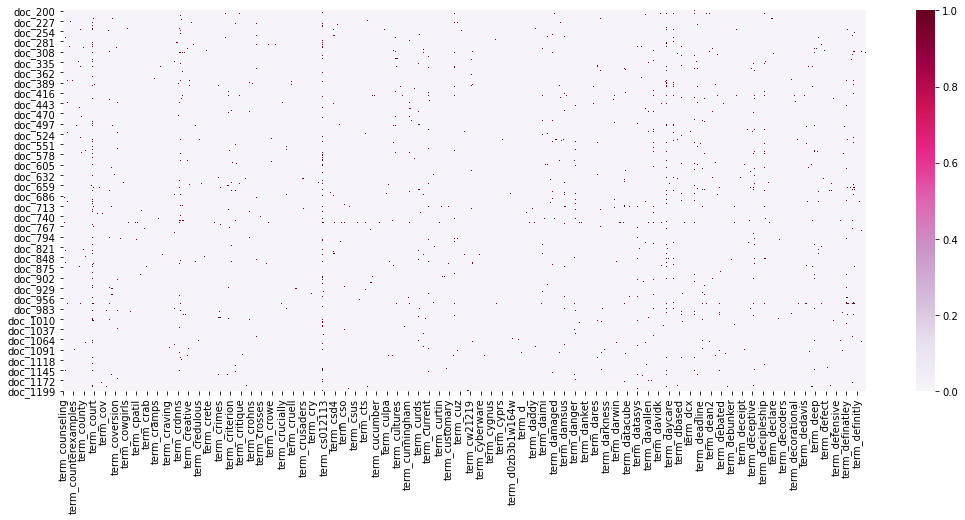

In [13]:
## user-defined range of terms and docs

import seaborn as sns

# function for specifying articles and terms to query
def docterm(doc,docqty,term,termqty):
    plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[term:term+termqty]]
    plot_y = ["doc_"+ str(i) for i in list(X.index)[doc:doc+docqty]]
    plot_z = X_counts[doc:doc+docqty, term:term+termqty].toarray()
    df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    plt.subplots(figsize=(18, 7))
    ax = sns.heatmap(df_todraw,
                     cmap="PuRd",
                     vmin=0, vmax=1, annot=False) #showing frequency isn't useful
    return

docterm(200,1000,10000,1000)

---

### >>> **Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [14]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

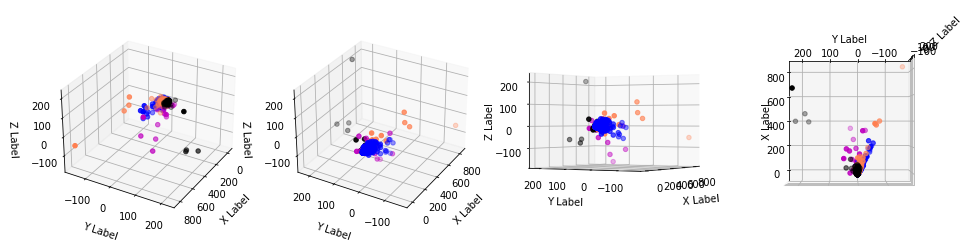

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# this is a bug mentioned in https://github.com/scikit-learn/scikit-learn/issues/7568
# there's an error in the first time PCA runs, rerunning PCA won't cause error
# so I use the loop for running PCA twice

for x in range(0, 2):  # try 2 times
    try:
        X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
    except:
        pass

colX = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (16,6))

# function for generating side-by-side 3D plots
def makeplotX(position,elevation,azimuth):
    ax = fig.add_subplot(position,projection='3d')
    for c, category in zip(colX, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    # cosmetic elements
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elevation, azimuth)
    return ax 

ax1 = makeplotX(141,30,30)
ax2 = makeplotX(142,30,210)
ax3 = makeplotX(143,0,210)
ax4 = makeplotX(144,90,180)

plt.show()

#### ※ Describe the plot

- For the 1st plot (left), I set `azimuth=30` to generate the plot, but it turns out that X axis is outside in. Higher values are closer to the viewer, so it's hard to see the distribution of each category from this angle.

- For the 2nd plot (middle left), I set `azimuth=210`, now it's easier to see the distribution.

- For the 3rd plot (middle right), I set `elevation=0` to better see how catagories are distributed on z-axis.

- For the 4th plot (right), I set `elevation=90` to see the plot from a top view, emphasizing distribution on x- and y-axes.

The blue category is the most densed, followed by the black category in which there are a few outliers. The magenta and coral categories are relatively more sparse and having more outliers than the former two categories.

---

### >>> Exercise 13 (take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### >>> Exercise 14 (take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

### >>>> **Answer for Exercise 13&14**

In [16]:
## Ans for Exercise 14:

# Limit the maximum number of terms to count, so the document-term matrix becomes more compact
count_vect = CountVectorizer(max_features=200)
X_counts = count_vect.fit_transform(X.text)

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


## Ans for Exercise 13: offline interactive bar plot by plotly, with panning and zooming
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
init_notebook_mode()

data = [go.Bar(
            x=np.array(count_vect.get_feature_names()),
            y=term_frequencies)]
layout = go.Layout(title='Word Frequency',       # add a graph title
                   xaxis=dict(type='category'))  # x axis is categorical data

fig = go.Figure(data=data, layout=layout)
iplot(fig)

---

### >>> **Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

In [17]:
# combine term and frequency into a dataframe for sorting
vect_df = pd.DataFrame({"Term":np.array(count_vect.get_feature_names()),
                        "Counts":np.array(X_counts.sum(axis=0)[0]).flatten()}).sort_values(by=['Counts'], ascending=False)

# show sorted contents: top 200 most frequent words
vect_df

Term  Counts
151       the   29825
109        of   17660
165        to   17222
8         and   13017
81         is   12343
..        ...     ...
163   through     371
46      doesn     369
39     course     366
12   anything     366
63      group     363

[200 rows x 2 columns]

In [18]:
# offline interactive bar plot
data = [go.Bar(
            x=vect_df['Term'].to_numpy(),
            y=vect_df['Counts'].to_numpy())]
layout = go.Layout(title="Word Frequency",       # add a graph title
                   xaxis=dict(type='category'))  # x axis is categorical data

fig = go.Figure(data=data, layout=layout)
iplot(fig)

---

### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [19]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
X['bin_category'] = mlb.fit(X.category_name).transform(X['category_name']).tolist()
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]  
9                 sci.med  [0, 0, 1, 0]

In [20]:
mlb.classes_  # Yes, it works!

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

---

# Part 2: New dataset

## 1. The Data
The dataset contains sentences labelled with positive or negative sentiment.

---

## 2. Data Preparation
There are 2 values for catogories: positive and negative.

In [21]:
# categories for indexing
categories2 = ['negative','positive']

In [22]:
# import remaining datasets and combine all of them into a single dataframe
amazon = pd.read_csv("amazon_cells_labelled.txt", sep='\t', names=['sentence','category'])
imdb = pd.read_csv("imdb_labelled.txt", sep='\t', names=['sentence','category'])
yelp = pd.read_csv("yelp_labelled.txt", sep='\t', names=['sentence','category'])

# flag sources
amazon['source'] = 'amazon'
imdb['source'] = 'imdb'
yelp['source'] = 'yelp'

Y = pd.concat([amazon, imdb, yelp], ignore_index = True)
Y

sentence  category  source
0     So there is no way for me to plug it in here i...         0  amazon
1                           Good case, Excellent value.         1  amazon
2                                Great for the jawbone.         1  amazon
3     Tied to charger for conversations lasting more...         0  amazon
4                                     The mic is great.         1  amazon
...                                                 ...       ...     ...
2743  I think food should have flavor and texture an...         0    yelp
2744                           Appetite instantly gone.         0    yelp
2745  Overall I was not impressed and would not go b...         0    yelp
2746  The whole experience was underwhelming, and I ...         0    yelp
2747  Then, as if I hadn't wasted enough of my life ...         0    yelp

[2748 rows x 3 columns]

---

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [23]:
type(Y)  # the variable has already been a Pandas Dataframe since reading the text files

pandas.core.frame.DataFrame

#### Adding Columns

In [24]:
# add category label

def label_category (row):
   if row['category'] == 0 :
      return 'negative'
   if row['category'] == 1 :
      return 'positive'
   return None 
    
Y["category_name"] = Y.apply(label_category, axis=1)
Y[0:10]

sentence  category  source  \
0  So there is no way for me to plug it in here i...         0  amazon   
1                        Good case, Excellent value.         1  amazon   
2                             Great for the jawbone.         1  amazon   
3  Tied to charger for conversations lasting more...         0  amazon   
4                                  The mic is great.         1  amazon   
5  I have to jiggle the plug to get it to line up...         0  amazon   
6  If you have several dozen or several hundred c...         0  amazon   
7        If you are Razr owner...you must have this!         1  amazon   
8                Needless to say, I wasted my money.         0  amazon   
9                   What a waste of money and time!.         0  amazon   

  category_name  
0      negative  
1      positive  
2      positive  
3      negative  
4      positive  
5      negative  
6      negative  
7      positive  
8      negative  
9      negative

---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [25]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))
# no missing values

sentence                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

### 4.2 Dealing with Duplicate Data

In [26]:
sum(Y.duplicated())
# duplicate records exist!

17

In [27]:
# find all the duplicated records
Y[Y.duplicated() == True]

sentence  category  source  \
285                                       Great phone!.         1  amazon   
407                                        Works great.         1  amazon   
524                                       Works great!.         1  amazon   
543                             Don't buy this product.         0  amazon   
744   If you like a loud buzzing to override all you...         0  amazon   
748                                       Does not fit.         0  amazon   
778                               This is a great deal.         1  amazon   
792                                        Great Phone.         1  amazon   
892                    Excellent product for the price.         1  amazon   
896                                        Great phone.         1  amazon   
1165                   Definitely worth checking out.           1    imdb   
1387                                 Not recommended.           0    imdb   
1590                                            10/10           1    imdb   
2562                                 I love this place.         1    yelp   
2564                             The food was terrible.         0    yelp   
2591                                   I won't be back.         0    yelp   
2594                  I would not recommend this place.         0    yelp   

     category_name  
285       positive  
407       positive  
524       positive  
543       negative  
744       negative  
748       negative  
778       positive  
792       positive  
892       positive  
896       positive  
1165      positive  
1387      negative  
1590      positive  
2562      positive  
2564      negative  
2591      negative  
2594      negative

It turns out these records aren't really duplicated. In this dataset, Pandas's `.duplicated()` fails to identify duplicate data accurately.

---

## 5.  Data Preprocessing
### 5.1 Sampling

In [28]:
Y_sample = Y.sample(n=1000) #random state
Y_sample

sentence  category  source  \
1991  (It wasn't busy either) Also, the building was...         0    yelp   
1062              I'd advise anyone to go and see it.           1    imdb   
1358  Both films are terrible, but to the credit of ...         0    imdb   
179   If you like a loud buzzing to override all you...         0  amazon   
1681  Kathy Bates is wonderful in her characters sub...         1    imdb   
...                                                 ...       ...     ...   
696   The phone can also take great pictures and eve...         1  amazon   
873            My sister has one also and she loves it.         1  amazon   
262                                        Works great.         1  amazon   
2666  They brought a fresh batch of fries and I was ...         0    yelp   
767   I really wanted the Plantronics 510 to be the ...         0  amazon   

     category_name  
1991      negative  
1062      positive  
1358      negative  
179       negative  
1681      positive  
...            ...  
696       positive  
873       positive  
262       positive  
2666      negative  
767       negative  

[1000 rows x 4 columns]

<AxesSubplot:title={'center':'Category distribution'}>

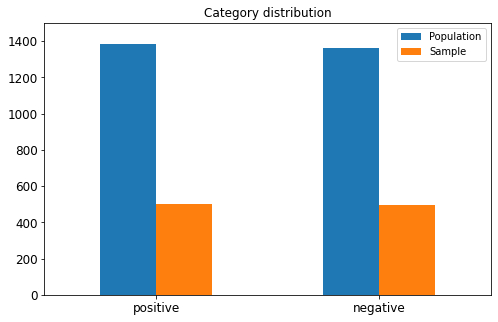

In [29]:
# join 2 datasets by merging into one single dataframe
plotY = pd.DataFrame({
    "Population":Y.category_name.value_counts(),      # Y dataset
    "Sample":Y_sample.category_name.value_counts()},  # Y_sample dataset
    index=categories2).sort_values(by=['Population'], ascending=False)  # sort descending by counts of category_name in Y dataset

plotY.plot(kind = 'bar',
                        title = 'Category distribution',
                        ylim = [0, 1500], 
                        rot = 0, fontsize = 12, figsize = (8,5))

### 5.2 Feature Creation

In [30]:
Y['unigrams'] = Y['sentence'].apply(lambda x: dmh.tokenize_text(x))
Y

sentence  category  source  \
0     So there is no way for me to plug it in here i...         0  amazon   
1                           Good case, Excellent value.         1  amazon   
2                                Great for the jawbone.         1  amazon   
3     Tied to charger for conversations lasting more...         0  amazon   
4                                     The mic is great.         1  amazon   
...                                                 ...       ...     ...   
2743  I think food should have flavor and texture an...         0    yelp   
2744                           Appetite instantly gone.         0    yelp   
2745  Overall I was not impressed and would not go b...         0    yelp   
2746  The whole experience was underwhelming, and I ...         0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...         0    yelp   

     category_name                                           unigrams  
0         negative  [So, there, is, no, way, for, me, to, plug, it...  
1         positive               [Good, case, ,, Excellent, value, .]  
2         positive                      [Great, for, the, jawbone, .]  
3         negative  [Tied, to, charger, for, conversations, lastin...  
4         positive                           [The, mic, is, great, .]  
...            ...                                                ...  
2743      negative  [I, think, food, should, have, flavor, and, te...  
2744      negative                     [Appetite, instantly, gone, .]  
2745      negative  [Overall, I, was, not, impressed, and, would, ...  
2746      negative  [The, whole, experience, was, underwhelming, ,...  
2747      negative  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2748 rows x 5 columns]

### 5.3 Feature subset selection

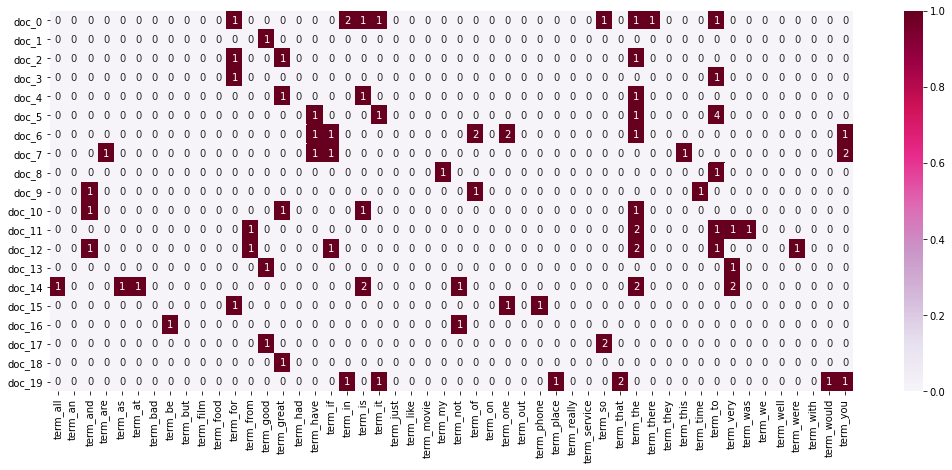

In [31]:
# GOAL: Finding top 50 words most frequently used in the first 20 sentences

count_vect = CountVectorizer(max_features=50)
Y_counts = count_vect.fit_transform(Y.sentence) 

# top 50 words
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]

# first 20 sentences
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:20]]

plot_z = Y_counts[0:20, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

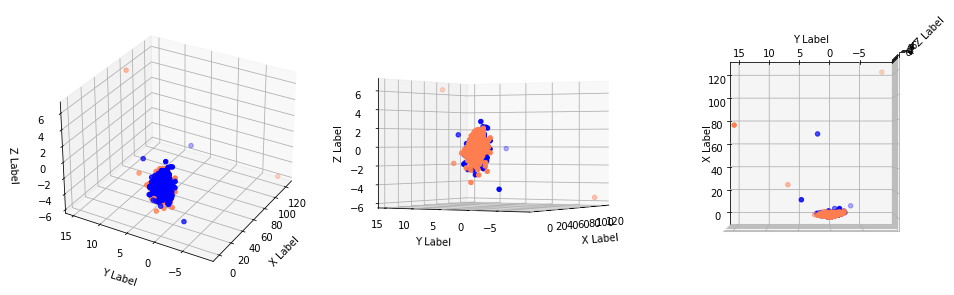

In [32]:
# Reduced to 3
for x in range(0, 2):  # try 2 times
    try:
        Y_reduced = PCA(n_components = 3).fit_transform(Y_counts.toarray())
    except:
        pass

colY = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (16,6))

# function for generating side-by-side 3D plots
def makeplotY(position,elevation,azimuth):
    ax = fig.add_subplot(position,projection='3d')
    for c, category in zip(colY, categories2):
        xs = Y_reduced[Y['category_name'] == category].T[0]
        ys = Y_reduced[Y['category_name'] == category].T[1]
        zs = Y_reduced[Y['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')     
    # cosmetic elements
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elevation, azimuth)
    return ax 

ax1 = makeplotY(131,30,210)
ax2 = makeplotY(132,0,210)
ax3 = makeplotY(133,90,180)

plt.show()

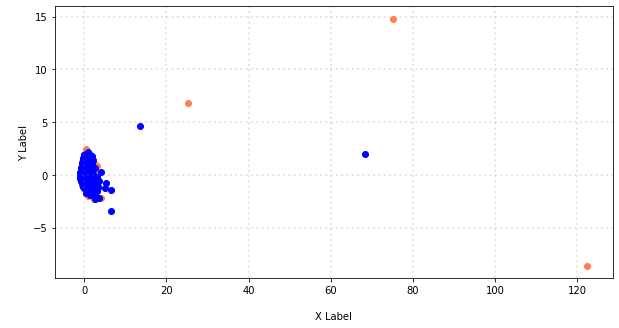

In [33]:
# Reduced to 2
for x in range(0, 2):  # try 2 times
    try:
        Y_reduced = PCA(n_components = 2).fit_transform(Y_counts.toarray())
    except:
        pass

# plot
fig = plt.figure(figsize = (10,5))
ax = fig.subplots()

for c, category in zip(colY, categories2):
    xs = Y_reduced[Y['category_name'] == category].T[0]
    ys = Y_reduced[Y['category_name'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [34]:
# offline interactive bar plot
import math

# combine term and frequency (in natural log) into a dataframe for sorting
vect_Y = pd.DataFrame({"Term":np.array(count_vect.get_feature_names()),
                        "Counts":[math.log(i) for i in np.array(Y_counts.sum(axis=0)[0]).flatten()]}).sort_values(by=['Counts'], ascending=False)

# Bar plot
data = [go.Bar(
            x=vect_Y['Term'].to_numpy(),
            y=vect_Y['Counts'].to_numpy())]
layout = go.Layout(title="Word Frequency (in natural log scale)",       # add a graph title
                   xaxis=dict(type='category'))  # x axis is categorical data

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### 5.6 Discretization and Binarization


In [35]:
mlb.fit(Y.category)

Y['bin_category'] = mlb.transform(Y['category']).tolist()
Y[0:10]
# The values in 'category' are already binary
# Binarization is thus not necessary in this dataset

sentence  category  source  \
0  So there is no way for me to plug it in here i...         0  amazon   
1                        Good case, Excellent value.         1  amazon   
2                             Great for the jawbone.         1  amazon   
3  Tied to charger for conversations lasting more...         0  amazon   
4                                  The mic is great.         1  amazon   
5  I have to jiggle the plug to get it to line up...         0  amazon   
6  If you have several dozen or several hundred c...         0  amazon   
7        If you are Razr owner...you must have this!         1  amazon   
8                Needless to say, I wasted my money.         0  amazon   
9                   What a waste of money and time!.         0  amazon   

  category_name                                           unigrams  \
0      negative  [So, there, is, no, way, for, me, to, plug, it...   
1      positive               [Good, case, ,, Excellent, value, .]   
2      positive                      [Great, for, the, jawbone, .]   
3      negative  [Tied, to, charger, for, conversations, lastin...   
4      positive                           [The, mic, is, great, .]   
5      negative  [I, have, to, jiggle, the, plug, to, get, it, ...   
6      negative  [If, you, have, several, dozen, or, several, h...   
7      positive  [If, you, are, Razr, owner, ..., you, must, ha...   
8      negative    [Needless, to, say, ,, I, wasted, my, money, .]   
9      negative       [What, a, waste, of, money, and, time, !, .]   

  bin_category  
0          [0]  
1          [1]  
2          [1]  
3          [0]  
4          [1]  
5          [0]  
6          [0]  
7          [1]  
8          [0]  
9          [0]

---

## 6. Data Exploration

In [36]:
# Retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[200]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[400]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[600]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [37]:
# Preview
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['what a disappointment']
["Their Research and Development division obviously knows what they're doing."]


In [38]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Take a look at the count vectors
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  2 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Show results 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.223607
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 0.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

# Part 3: New tasks on the new dataset

## New data visualizations
Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 

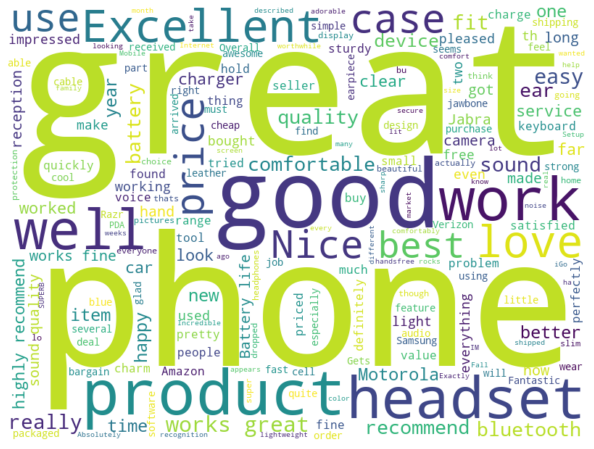

In [40]:
# GOAL: Visualize top words for POSITIVE sentiments in AMAZON dataset
data_1 = pd.Series.to_string(Y.loc[lambda f: (f.category==1) & (f.source=="amazon")]['sentence'],index=False)

# plot a word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords_amazon = set(STOPWORDS)

wordcloud_1 = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords_amazon, background_color="white").generate(data_1)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

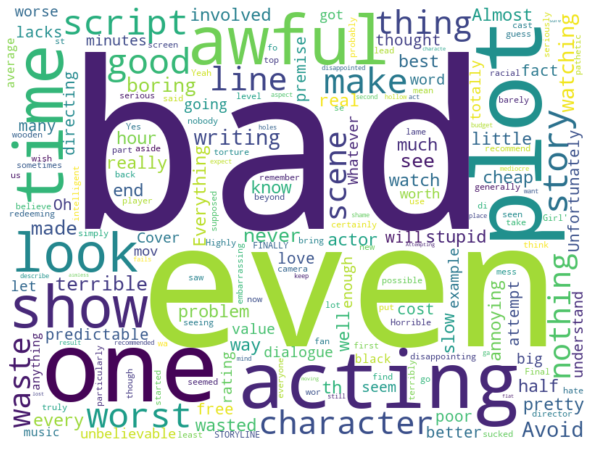

In [41]:
# GOAL: Visualize top words for NEGATIVE sentiments in IMDB dataset
data_0 = pd.Series.to_string(Y.loc[lambda f: (f.category==0) & (f.source=="imdb")]['sentence'],index=False)

stopwords_imdb = set(STOPWORDS)
stopwords_imdb.update(["movie","film","movies","films"])     #excludes certain words

wordcloud_0 = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords_imdb, background_color="white").generate(data_0)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.axis("off")
plt.show()

---

## TF-IDF features
Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

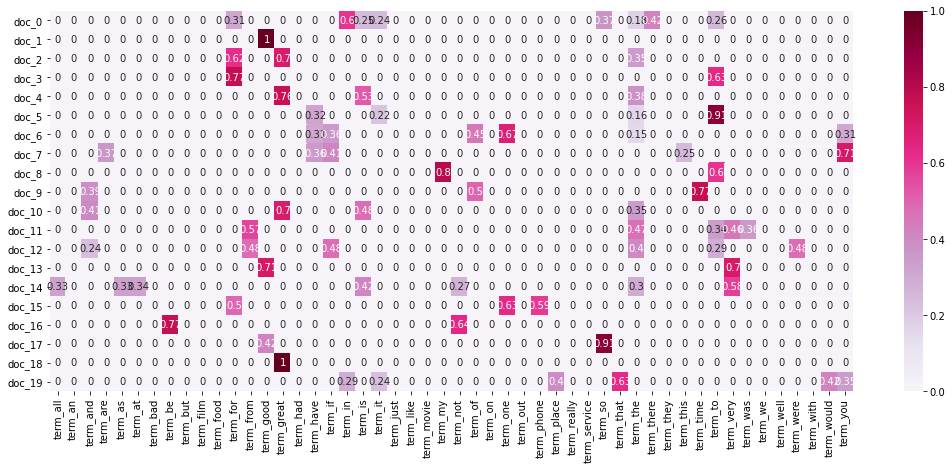

In [42]:
# GOAL: Finding top 50 words most frequently used in the first 20 sentences

from sklearn.feature_extraction.text import TfidfVectorizer

count_vect_tfidf = TfidfVectorizer(max_features=50)
Ytfidf_counts = count_vect_tfidf.fit_transform(Y.sentence)

# top 50 words
plot_x = ["term_"+str(i) for i in count_vect_tfidf.get_feature_names()[0:50]]

# first 20 sentences
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:20]]

plot_z = Ytfidf_counts[0:20, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",annot=True)

# notice that the values range from 0 to 1, unlike word frequency

---

## Naive Bayes classifier
Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

### Build with TF-IDF feature

In [43]:
# Split data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Y['sentence'], Y['category'], random_state=1)

X_train_cv_tfidf = count_vect_tfidf.fit_transform(X_train)
X_test_cv_tfidf = count_vect_tfidf.transform(X_test)

# Prediction

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

naive_bayes.fit(X_train_cv_tfidf, y_train)
predictions = naive_bayes.predict(X_test_cv_tfidf)

# Prediction metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score:  0.6506550218340611
Precision score:  0.7205387205387206
Recall score:  0.5768194070080862


Text(91.68, 0.5, 'predicted label')

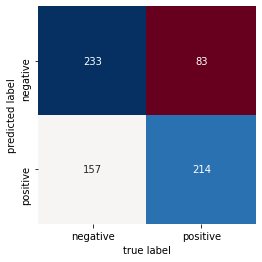

In [44]:
# Generate a confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
xticklabels=categories2, yticklabels=categories2)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [45]:
# Sample query: compare actual and predicted category

testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append(1)
    else:
        testing_predictions.append(0)
check_df = pd.DataFrame({'sentence':list(X_test), 'category_actual': list(y_test), 'category_predicted': testing_predictions})
check_df.iloc[::50, 0:3][0:10]

sentence  category_actual  \
0                     I mean this in a terrible way.                  0   
50   If someone orders two tacos don't' you think i...                0   
100               None of it works, just don't buy it.                0   
150  The pizza tasted old, super chewy in not a goo...                0   
200                           Service was very prompt.                1   
250                 It doesn't work in Europe or Asia.                0   
300  There is simply no excuse for something this p...                0   
350  Plus, with the movie's rather modest budget an...                1   
400                           Wow... Loved this place.                1   
450                                     Nice ambiance.                1   

     category_predicted  
0                     1  
50                    0  
100                   0  
150                   0  
200                   0  
250                   0  
300                   0  
350                   1  
400                   1  
450                   0

---

### Build with word frequency feature

In [46]:
# Split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(Y['sentence'], Y['category'], random_state=1)

X_train_cv = count_vect.fit_transform(X_train)
X_test_cv = count_vect.transform(X_test)

# Prediction

naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score:  0.6346433770014556
Precision score:  0.6935483870967742
Recall score:  0.5795148247978437


Text(91.68, 0.5, 'predicted label')

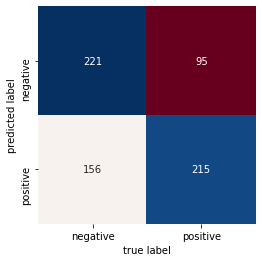

In [47]:
# Prediction metrics

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
xticklabels=categories2, yticklabels=categories2)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [48]:
# Sample query: compare actual and predicted category

testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append(1)
    else:
        testing_predictions.append(0)
check_df = pd.DataFrame({'sentence':list(X_test), 'category_actual': list(y_test), 'category_predicted': testing_predictions})
check_df.iloc[::50, 0:3][0:10]

sentence  category_actual  \
0                     I mean this in a terrible way.                  0   
50   If someone orders two tacos don't' you think i...                0   
100               None of it works, just don't buy it.                0   
150  The pizza tasted old, super chewy in not a goo...                0   
200                           Service was very prompt.                1   
250                 It doesn't work in Europe or Asia.                0   
300  There is simply no excuse for something this p...                0   
350  Plus, with the movie's rather modest budget an...                1   
400                           Wow... Loved this place.                1   
450                                     Nice ambiance.                1   

     category_predicted  
0                     1  
50                    0  
100                   0  
150                   0  
200                   1  
250                   1  
300                   0  
350                   1  
400                   1  
450                   0

---

### ※ Differences between using TF-IDF and word frequency features

- __TF-IDF__
Accuracy:  0.65
Precision:  0.72
Recall:  0.58

- __word frequency__
Accuracy:  0.63
Precision:  0.69
Recall:  0.58

TF-IDF feature yields more accuracy and precision than word frequency feature, and also:
- having less false positive than word frequency feature (83 vs 95)
- TF-IDF's false positive is almost as same as word frequency's (157 vs 156)

---

# Part 4: Possible improvements
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

__1. First dataset (fetch_20newsgroups)__
- The texts seem to come from email correspondences. As seen in the document-term matrix, many numbers are counted as frequency without meaningfulness especially when `max_features` is undefined. __We can try including only subjects and contents of the emails, removing email addresses and telephone numbers, for example.__ In order to do so, the texts need to be parsed into separated columns such as `'from'`, `'subject'`, `'content'`, `'location'`, etc. This will also allow analyzing the subjects and the contents separately.

__2. Second dataset (sentence and sentiment)__
- Before combining datasets from different sources, __flagging sources should be done for more flexible downstream analysis__ such as generating document-term matrices separately for Amazon and IMDB. In case of wordclouds, fortunately, the 2 wordclouds generated above (for Amazon and IMDB) don't share the same document-term matrix because the `WordCloud` function itself can also calculate the word frequency without relying on a document-term matrix.
- In this dataset, __Pandas's `.duplicated()` fails to identify duplicate data accurately.__ It turns out these records aren't really duplicated. The raw text files don't provide any indexes etiher, so it's hard to tell if each sentence and its corresponding sentiment is duplicated or not. Fortunately, there are still subtle differences to notice (such as punctuation marks and different capitalization). But what if there are 2 sentences (from 2 different people) of which all characters are identical to each other accidentally? (For example: `"Good!"`)

---